$u_x = u (1-u)$

In [2]:
#Imports
import numpy as np 
from numpy import pi
import matplotlib.pyplot as plt
import sciann as sn 
from sciann_datagenerator import * 

We are going to solve the logistic equation.If $f$ is the solution of the logistic equation with initial value $x_0$, our function will take two inputs, x_0 and x, and give the value of $f$.

In [63]:
#voy a hacer la ecuacion logistica en un intervalo en R

#armo un intervalo en R, [0,4]. Le voy a poner boundary condition en el borde izquierdo que va a ser el dato inicial

dg = DataGeneratorXY([0., 4.], [0. ,2.], ["domain",  "bc-left"], 2000) #, "bc-right"]
input_data, target_data = dg.get_data()

#input_data : los valores de x donde voy a evaluar la u
#target_data: Los valores de u(x) para cada x en input_data. Como recien lo inicializo, es vector de ceros.
#Se rellena cuando entrenemos la red.



In [64]:
#dg.target_data

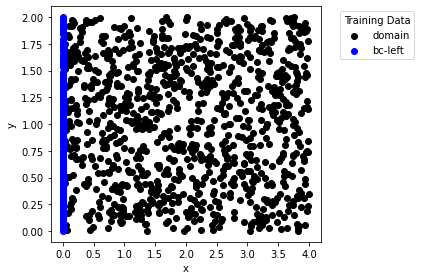

In [65]:
dg.plot_data()
#ploteo mis puntos _collocation points_ que tienen muchos puntos en el borde, al pedo, y  puntos en el intervalo [0,4]
#El scatter es solo para que se vea mejor, son todos puntos de R.

In [66]:
#defino mis funcion y mis variables
x = sn.Variable('x')
x0 = sn.Variable('x0')

u = sn.Functional('u', [x,x0], hidden_layers = 5*[30], activation = 'tanh', res_net=True) #esta es la red neuronal cruda sin entrenar,


In [67]:
#ahora defino la loss function para u

#Pido que satisfaga la ecuacion
L = sn.abs(sn.diff(u, x, order=1) + u * (sn.sub(u,1))) # sacando -1 de factor comun: Ux - u(1-u) = Ux + u (u-1)

#Dato inicial u(0) = x0
IC = (x==0.) * (sn.abs( sn.sub(u,x0)))

In [68]:
modelo = sn.SciModel([x,x0],[L,IC], optimizer = 'adam')


In [69]:
history = modelo.train(x_true = input_data, 
             y_true = target_data, 
             epochs = 300,
             learning_rate = 0.001,
             adaptive_weights={'method': 'NTK', 'freq':10, 'use_score':True})


Total samples: 2500 
Batch size: 64 
Total batches: 40 


+ NTK evaluation time [s]: 1.566091775894165 

+ adaptive_weights at epoch 1: [0.10395623238520024, 1.8960437676147999]
Epoch 1/300
40/40 [==============================] - 3s 48ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.0913 - abs_8_loss: 0.6179 - mul_146_loss: 0.0142 - lr: 0.0010 - time: 5.3751 - loss_weight_0: 0.1040 - loss_weight_1: 1.8960 - loss_gradient_0: 3630.3598 - loss_gradient_1: 18.9969
Epoch 2/300
40/40 [==============================] - 1s 19ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.0155 - abs_8_loss: 0.1110 - mul_146_loss: 0.0021 - lr: 0.0010 - time: 0.7442 - loss_weight_0: 0.1040 - loss_weight_1: 1.8960 - loss_gradient_0: 3630.3598 - loss_gradient_1: 18.9969
Epoch 3/300
40/40 [==============================] - 1s 18ms/step - batch: 19.5000 - size: 62.5000 - loss: 0.0058 - abs_8_loss: 0.0424 - mul_146_loss: 7.1398e-04 - lr: 0.0010 - time: 0.8189 - loss_weight_0: 0.1040 - loss_weight_1: 1.8960 - l

Now our model is successfully trained.

# Solution

Now that our model is trained, we can access it with the eval method. We will plot the solution $u$ of the logistic equation for different initial values $x_0$.

In [70]:
#number of data points to plot
n = 100
m = 10

valores = np.meshgrid(np.linspace(0,4,n), np.linspace(0,2,m))
valores_u = u.eval(valores)

In [71]:
len(valores_u)

10

In [72]:
#We build our vectors to plot

def values_of_uxx0(j0):

    x = np.linspace(0,4,n)
    y = [ 0 for i in range(n)]
    for i in range(n):
        y[i] = valores_u[j0][i]

    return x, y 

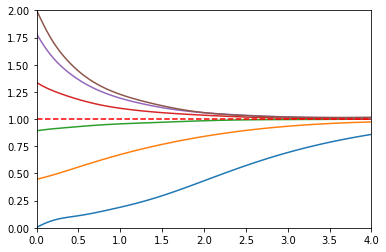

In [62]:

for j in [0,2,4,6,8,9]:
    x,y = values_of_uxx0(j)
    plt.plot(x,y)


#plt.plot(valores,valores_y)
plt.xlim([0,4])
plt.ylim([0,2])
plt.plot([0,4],[1,1],'--r') #the equilibrium value

plt.show()

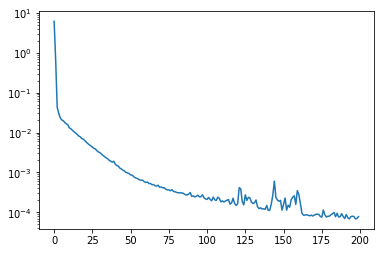

In [57]:
#Plot of the evolution of the loss function over the epocs
plt.semilogy(history.history['loss'])

# Posible future work
$u_t = Lap (u) + u(1-u/k)$

u(x,t) = proporcion de gente en x a tiempo t